# Applied Statistics Assessment
*************************************

## Introduction
### Problem Set Solutions for Applied Statistics
This notebook contains my solutions to the assessment problem set for *Applied Statistics*, a module I am taking as part of a Higher Diploma in Computer Science and Data Analytics at Atlantic Technological University.


## Problem 1: Extending the Lady Tasting Tea
**********************************
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design

In [25]:
#Import Libraries
import math
import numpy as np
import random
import matplotlib.pyplot as plt 
import itertools

In [26]:
#Set up the experiment
cups = 12 #12 cups of tea are made
milk_first = 4 #4 of which have the milk added first 

math.comb(cups, milk_first) #math.comb will return the number of ways to choose 4 cups from 12, order does not matter

495

### `math.comb()` and the Combinations Formula 

- In the code cell above, `math.comb(n,k)` (see the [Python Documentation](https://docs.python.org/3/library/math.html#math.comb) for `math.comb(n,k)`) returned the number of ways to choose 4 cups from 12, without being able to choose the same cup twice, and the order the cups are chosen in does not matter.
- The calculation returned that there are 495 ways to choose 4 cups from 12. 
- The `math.comb(n,k)` function uses the **Combinations Formula** to return number of ways to choose k items from n items without repetition and without order.
$$ \frac{n!}{k!\times(n-k)!} $$

#### Detailed Explanation of the Combinations Formula:
Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Placeholders: `_ _ _ _`

- In the scenario where the order in which the cups are chosen does matter, i.e. choosing cups `2`, `4`, `5`, `8`,  is not the same as choosing cups `8`, `4`, `5`, `2`, which is not the same as `2`, `5`, `8`, `4`, the number of ways to choose 4 cups in this scenario  ends up being: 

$$
12 \times 11 \times 10 \times 9  
$$
- This is because there are 12 options for the first cup to be placed in place 1.  
- When a cup has been put in place 1, there are 11 remaining options for place 2.
- When a cup has been put in place 2, there are 10 remaining options for place 3
- When a cup has been put in place 3, there are 9 remaining options for place 4. 

In [27]:
#In the scenario where the order of items chosen is irrelevant, the number of permutations of 4 items taken from 12 can have is 
twelve_p_four = 12*11*10*9
twelve_p_four

11880

#### Permutations of 4
- However, in this Lady Tasting Tea Experiment, we do not care about the order the cups are chosen.
- The amount of different ways in which the same 4 cups can be chosen is $4!$, or $4 \times 3 \times 2 \times 1$ 

In [28]:
# The number of different permutations 4 cups can have 
permutations_four_items = 4*3*2*1
permutations_four_items

24

- Therefore, dividing the number of ways to take 4 items from 12 items by the number of permutations those 4 items can have, will give the number of ways to choose 4 items from 12 items, without regard to the order of these 4 items. 

In [29]:
#The number of ways 4 items can be chosen from 12 items
twelve_choose_four = twelve_p_four/permutations_four_items 
twelve_choose_four

495.0

In [30]:
# Excecuting the experiment
labels = list(range(12)) #Label the cups 1 to 12
combs = list(itertools.combinations(labels, 4)) #Create a list with the 495 combinations of 4 cups that exist 
milk_cups = random.sample(labels, 4) #Create a list containing the actual combination of cups that contain the milk first
milk_cups

[0, 2, 11, 1]

### `itertools.combinations()`
- In the code cell above, `itertools.combinations()` (see the [Python Documentation](https://docs.python.org/3/library/itertools.html#itertools.combinations) for the `itertools.combinations()` function) returns a set containing all possible 495 combinations of 4 cups that can be chosen. 
- This is wrapped in a `list()` wrapper so that the list of combinations can be passed to the `for` loop excecuted in the code cell below. 

In [31]:
#Get the intersection between the list of 495 combinations and the actual set with milk first 
milk_cups_set = set(milk_cups) #Create a set out of the list of cups containing the milk, as the .intersections() only accepts sets
number_overlaps = [] #Create an empty list that can contain the number of overlapping cups in each combination tested

for comb in combs:
    comb_set = set(comb) # for each combination in the list - first make it into a set so that the .intersections() function works
    overlap = comb_set.intersection(milk_cups_set) # use intersection() to ascertain which (if any) of the cups in your comb overlap with the set of milk_cups
    number_overlaps.append(len(overlap))# Add the number of cups that overlap to the list created above 

### `.intersection()`
- In the code cell above, the operator `.intersection()` is used to find the intersection between two sets, and return a set that includes only the common elements present in both sets.
- See the [this article](https://www.geeksforgeeks.org/python/python-set-operations-union-intersection-difference-symmetric-difference/) for an explanation of the operations can can be performed on sets in Python, including the `.intersection()` operation.
- In this instance, `.intersection()` is used to find the intersection between the combination of cups being tested and the actual combination of cups that contain the milk first, returning a set with the labels that are common to both.
- The length of the returned set will return the number of milk cups present in the combination being tested.
- This number is added to the list created `number_overlaps`.   

In [38]:
# In how many of the 495 combinations does 1 milk cup, 2 milk cups, 3 milk cups, and 4 milk cups show up?
counts = np.unique(number_overlaps, return_counts=True) #np.unique will return an array of the unique numbers occuring in the list number_overlaps, and return_counts = True will return an array with the number of times each of these numbers occurs
print(counts)

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))


### `np.unique()`
- In the above cell, `np.unique()` is performed on the `number_overlaps` list created in the for loop above. 
- This will return return an array of the unique numbers occuring in the list `number_overlaps`, and specifying `return_counts = True` will return an array with the number of times each of these numbers occurs.  
- The Numpy Documentation for this function can be read [here](https://numpy.org/devdocs/reference/generated/numpy.unique.html#numpy-unique).
- From the arrays returned, the following 
    - 70 of the 495 possible combinations of cups have no milk cups in the set of cups chosen.
    - 224 of the 495 possible combinations have 1 milk cup in the set chosen.  
    - 168 of the 495 possible combinations have 2 milk cups in the set.
    - 32 of the 495 possible combinations have 3 milk cups in the set.
    - And obviously, there is only one possible combination containing all 4 milk cups. 

Text(0.5, 1.0, 'Distribution of Milk Cups in 495 Possible Combinations')

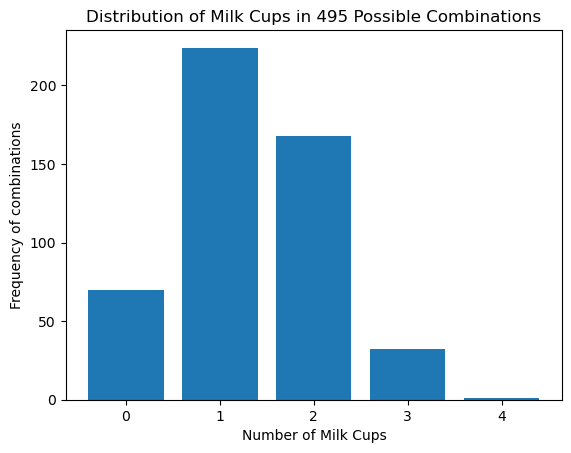

In [44]:
#Creating a barchart outlining the number of combinations containing 0, 1, 2, 3, and 4 milk cups
fig, ax = plt.subplots()
ax.bar(counts[0], counts[1]) 
ax.set_xlabel("Number of Milk Cups")
ax.set_ylabel("Frequency of combinations")
ax.set_title("Distribution of Milk Cups in 495 Possible Combinations")

In [ ]:
#From the above overlaps in the list of 495 possible combinations
p_zero_cups = 70/495 #The probability that none of the cups chosen overlap with the set of 4 cups containing milk first 
p_one_cup = 224/495 #The probability that only 1 of the cups chosen overlap with the set of 4 cups containing milk first
p_two_cups = 168/495  #The probability that only 2 of the cups chosen overlap with the set of 4 cups containing milk first
p_three_cups = 32/495 #The probability that only 3 of the cups chosen overlap with the set of 4 cups containing milk first
p_all_cups = 1/495 #The probability that all of the cups chosen overlap with the set of 4 cups containing milk first 

p_at_least_three_cups = (1+32)/495 #The probability that at least 3 of the cups chosen overlap with the set of 4 cups containing milk first
p__at_least_two_cups = (1+32+168)/495  #The probability that at least 2 of the cups chosen overlap with the set of 4 cups containing milk first
p_at_least_one_cup = (1+32+168+224)/495  #The probability that at least 1 of the cups chosen overlap with the set of 4 cups containing milk first

### Hypothesis Testing 

#### $H0$ Null Hypothesis: 
- She cannot tell the difference - she is choosing the cups at random.  

#### $Ha$ Alternative Hypothesis
- She is not choosing the cups at random - this Lady knows her tea!

### Performing the Hypothesis Test 
- First, we need to compute the *p*-value for each of the options, assuming the null hypothesis that she cannot distinguish the cup. 
    - The code cell above computes the *p*-value for each possible event. 
- We then need to set a significance level. If the *p*-value falls below the significance level we have set, we can reject the null hypothesis in favour of the alternative hypothesis that she is not choosing at random.
    - Setting a significance level of 0.05 will give us a 5% chance of incorrectly accepting or rejecting the null hypothesis. 
$$ 
\alpha = 0.05 
$$

In [34]:
alpha = 0.05 #Set the significance level - 0.05 will give us a 5% chance of incorrectly accepting or rejecting the null hypothesis
print(f"The p-value for correctly choosing the 4 milk first cups at random is {p_all_cups:.3f}.")
print(f"This is below our significance level of {alpha}, so the result is statistically significant.")
print("Therefore, if the lady chooses 4 cups correctly, we can reject the null hypothesis in favour of the alternative hypothesis.")


The p-value for correctly choosing the 4 milk first cups at random is 0.002.
This is below our significance level of 0.05, so the result is statistically significant.
Therefore, if the lady chooses 4 cups correctly, we can reject the null hypothesis in favour of the alternative hypothesis.


In [ ]:
print(f"The p-value for choosing 3 correct cups is {p_three_cups:.3f}, which is above our significance level of {alpha}.")
print("This result is not statistically significant. \nIf the lady chooses 3 cups correctly, we cannot reject the null hypothesis at the 5% significance level.")

The p-value for choosing 3 correct cups is 0.065, which is above our significance level of 0.05.
This result is not statistically significant. 
If the lady chooses 3 cups correctly, we cannot reject the null hypothesis at the 5% significance level.


### Adjusting the *p*-value threshold: Would you consider extending or relaxing the *p*-value threshold compared to the original design?

In the extended experiment, the significance probability, or the probability of correctly identifying all 4 milk first cups by random chance, is lower than in the original experiment using only 8 cups. Identifying the 4 milk cups by random guessing is less likely in our extended experiment. Accepting the alternative hypothesis under these conditions would be what is known as a Type I error, or a False Positive.

In the context of the Lady Tasting Tea hypothesis test: 
- **Type I Error** (or False Positive): This occurs when you incorrectly reject the null hypothesis in favour of the alternative hypothesis.
    - You accept that the lady has special powers to identify the milk cups, when in reality, she is just guessing.
    - To reduce the probability of a Type I error (rejecting a true null hypothesis), set a lower *p*-value threshold. 
  
- **Type II Error** (or False Negative): This occurs when you incorrectly reject the alternative hypothesis in favour of the null hypothesis.
    - You reject that the lady can detect the milk cups, when in reality she is able to. 
    - To reduce the probability of a Type II error (rejecting a true alternative hypothesis), set a higher *p*-value threshold

There are some scenarios in which the typical *p*-value threshold of 0.05 is adjusted in order to minimise certain types of errors. In certain fields such as medicine or engineering it can be important to reduce the risk of false negatives, such as failing to detect a cancer or failing to recognise a fault in a machine. In these studies, it can be helpful to increase $\alpha$ in order to reduce Type II errors, at the expense of making more Type I errors. 

In the case of our extended Lady Tasting Tea experiment, setting a higher *p*-value threshold (for example, setting $\alpha = 0.1$) would increase the risk of a incorrectly accepting the alternative hypothesis that the lady has special powers, when in fact she is choosing cups at random. However, since extending our experiment to 12 cups inherently means that correctly identifying the 4 milk cups by random guessing is less likely, there does not seem to be any argument for relaxing the statistical significance level. 
 
However, setting a lower *p*-value threshold (for example, setting $\alpha = 0.01$) would increase the risk of accepting the null hypothesis that the lady has no special tea-tasting abilities, when in fact she really can tell the difference! Since extending the design does increase its robustness, tightening the statistical significance level to an $\alpha = 0.01$ could be considered. At this significance level, correct identification of the 4 milk cups would still be considered statistically significant.  

This [Geeks for geeks tutorial](https://www.geeksforgeeks.org/data-science/type-i-and-type-ii-errors/) and this [Stats With R article](https://www.statswithr.com/foundational-statistics/understanding-levels-of-significance-in-statistics) on Type I and Type II errors in hypothesis testing were both helpful in understanding how setting different significance levels affects the risks of errors, and how and when to adjust $\alpha$ depending on the costs of both error type for the particular experiment. 


## Problem 2: Normal Distribution
************************
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### Probability Density Function for a Normal Distribution
******************************** 
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
- The above function  describes a **Normal Distribution** (AKA as a **Gaussian Distribution**) in which:
    - $\mu$ = mean
    - $\sigma$ = standard deviation
    - $\sigma^2$ = variance 

#### **Understanding the Probability Density Function**
- This element of the function, $\frac{1}{\sqrt{2\pi\sigma^2}}$, is a constant that ensures that the area beneath the curve is always 1 (because the probability of everything, everywhere, all at once is 1!)
    - The $x$ is the variable which the probability density is being calculated for. 
    - The $(\mu)$ is the mean of the data, and describes where the function should be centred.
    - The $\sigma^2$ is the variance or the "spread" of the data around the centre point $\mu$. 
- This term, $e^{-(x-\mu)^2 / (2\sigma^2)}$, is known as the exponential decay terms and it describes the probability of $x$ decreasing exponentially as it moves further from $\mu$. 
    - $(x-\mu)^2$ is the squared distance of the variable from the mean.
    - Dividing this by the variance scales that distance based on the spread of the data. 

This [Geeks for geeks page](https://www.geeksforgeeks.org/maths/normal-distribution/) on the Normal Distribution, along with the [Wikipedia page](https://en.wikipedia.org/wiki/Normal_distribution) for Normal Distribution were both helpful for gaining an intuitive understanding of how the probability density function for a normal distribution describes a bell curve.

#### **The Standard Normal Distribution**
- The standard normal distribution is a normal distribition where: 
    - $\mu$ = 0 
    - $\sigma$ = 1
    - $\sigma^2$ = 1 

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Normal Distribution with Numpy
In the [Numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) for a normal distribution, the mean, $\mu$, is called the Location, `loc` of the data and the standard deviation, $\sigma$, is called the `scale` of the data.
- The documentation suggests initialising a random number generator and using that generator to draw random samples from a normal distribution. 

In [ ]:
#Initialise a random number generator
rng = np.random.default_rng()
#Use the rng to draw random samples from a normal distribution
data = rng.normal(loc=0.0, scale=1.0, #Draw samples from a normal distribution where loc=0 & scale=1
                  size=(100000,10)) #This returns an array of 100000 rows, with 10 numbers in each where each row has the normal distribution specified

### Distribution of the means 
**************
- `data = rng.normal(loc=0.0, scale=1.0,size=(100000,10))` returned an array with 100,000 rows, with each row containing 10 numbers with a distribution described by `loc=0.0, scale=1.0`, i.e., a standard normal distribution. 
- In the code cell below, the means of each of the 100,000 rows are retrieved using `np.mean(data, axis=1)` and plotted on a histogram.  
- This is a histogram the *sampling distribution of the means*.

Text(0.5, 1.0, 'Distribution of the means (n = 10)')

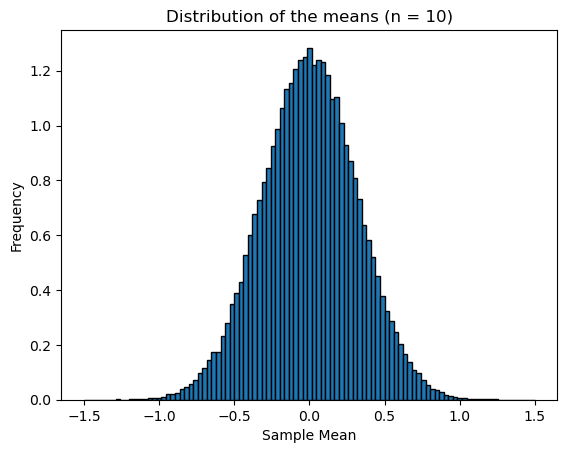

In [7]:
means=np.mean(data, axis=1)# This returns the means of each of the 1000 rows of data, each row being a std normal distribution of 100 numbers

#Plot a histrogram of the distsibution of the means
fig, ax = plt.subplots()
ax.hist(means, edgecolor="black", density="True", bins=np.linspace(-1.5,1.5,100)) #Plot the means on a histogram
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of the means (n = 10)")

- The values returned by `np.mean(data, axis=1)` is the sampling distribution of the sample means, where each sample is a row of 100 values with a standard normal distribution. 
- The sampling distribution of the means has a standard deviation of $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the standard deviation of each sample (in this case, 0), and $n$ is the number of samples in each sample.  
- This is known as the **standard error of the mean**. 
$$
SEM = \frac{\sigma}{\sqrt{n}}
$$.

### Sample SD (ddof=1) and Population SD (ddof=0)
- A sample refers to 1 row of 100 samples, randomly drawn from a standard normal distribution. 
- The population refers to the infinite Standard Normal Distribution these 10 numbers were drawn from. 
- The `np.std()` function, described in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), returns the standard deviation of an array of elements passed to it. 
- The argument `ddof`, Delta Degrees of Freedom, refers to the degrees of freedom used when calculation the standard deviation of the sample and ca take a 0 or a 1. 
- `ddof` has a default value of 0, meaning the default standard deviation calculated by Numpy's `np.std()` function is the population standard deviation, described by the following equation: 
$$
\sigma = \sqrt{\frac{ \sum_{i=1}^{N} (x_i - \mu)^2 }{N}}
$$
- However, passing an $N-1$ to the calculation for standard deviation in the place of $N$ corrects for the bias encountered when estimating the SD on an incomplete or finite sample of values chosen from an infinite distribution. (This is known as Bassel's correction.)
- The calculation for the sample standard deviation, with a ddof =1, is:
$$
\sigma = \sqrt{\frac{ \sum_{i=1}^{N} (x_i - \mu)^2 }{N-1}}
$$
- In the code cell below, `np.std()` is used to calculate the sample SD (using `ddof=1`) and the population SD (using `ddof=0`) for each of the 100,000 samples (n=10) in our data.
- A histogram of each set of standard deviations is the plotted on the same axis to compare.  


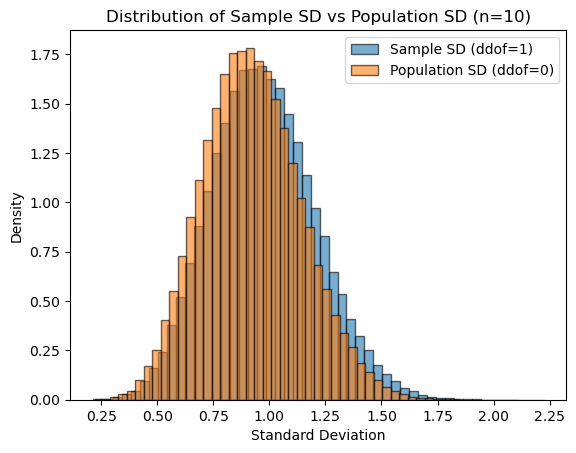

In [9]:
# Compute sample SD (ddof=1) and population SD (ddof=0) for each sample (row)
sample_sd = np.std(data, axis=1, ddof=1)
population_sd = np.std(data, axis=1, ddof=0)

# Plot histograms
fig, ax = plt.subplots()
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', edgecolor='black', density=True)
ax.hist(population_sd, bins=50, alpha=0.6, label='Population SD (ddof=0)', edgecolor='black', density=True)

ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.set_title('Distribution of Sample SD vs Population SD (n=10)')
ax.legend()


## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.

In [9]:
#Import Libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Initiate a random number generator from Numpy 
rng = np.random.default_rng(seed=98)
# Draw a sample of size 100 from standard normal distribution 
sample_a = rng.normal(loc=0, scale=1, size=100) #Draw samples from a normal distribution where mean=0 & sd=1, size of 100
sample_b = rng.normal(loc=0.1, scale=1, size=100)

### Independent Samples *t*-test 
- An independent samples *t*-test is used to determine if there is a statistically significant different between two sample means.
- More specifically, it tests whether the observed differnce between the sample means is bigger that would be expected with random sampling from populations with the same mean. 
- The test is unpaired (or, independent) because the observations in the first sample are not linked to the observations in the second sample. 
    - A paired *t*-test would be considered when the two samples are linked in some way, for example measuring the yield of a reaction before and after a change is made to a process, or taking a blood test result from a patient before and after a medication is administered.
    - There is also a one sample *t*-test, where you are comparing the mean of a sample against a hypothetical mean - i.e., you are asking "how likely is it that this sample is taken from a population where the mean is 5?" 
- The **null hypothesis** being tested is that population means that the two groups are drawn from are *equal*. 

#### References: 
- The Scipy documentation for this test can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
- I used the Wikipedia page for the [Student's *t*-test](https://en.wikipedia.org/wiki/Student%27s_t-test) and this tutorial on DataCamp, [An Introduction to Python *t*-tests](https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests), to learn more about *t*-tests and their uses.
- I used this [one-sample *t*-test example](https://www.jmp.com/en/statistics-knowledge-portal/t-test/one-sample-t-test) from JMP as the explanation of how the test statistic is calculated is quite intuitive. 

In [11]:
# Run an independent samples t-test on the two samples using scipy
stats.ttest_ind(sample_a, sample_b)

TtestResult(statistic=np.float64(-1.3847948686711613), pvalue=np.float64(0.16767360946214), df=np.float64(198.0))

### Interpretation of the Independent Samples *t*-test
- **$\alpha$ = 0.05**: This is the significance level we have set. There is a 5% risk of incorrectly rejecting the null hypothesis - a **Type I** error. 
- ***p*-value**: 
    - In a t-test, the *p*-value represents the probability of getting the data we have in our sample (or something more extreme) assuming the null hypothesis is true.
    - A *p*-value $\le$ 0.05 would indicate a difference between sample means, as a calculated significance probability less than the predetermined significance level indicates that the null hypothesis should be rejected in favour of the alternative hypothesis that there is a difference in the group means.  
- **Test Statistic:** Under the assumption that the means of the populations that the two samples are drawn from are the same population, the test statistic value gives us the difference between the sample mean and the overall mean in units of standard error.
- The calculation for the test statistics is as follows: 
$$
t=\frac{ \overline{x}-\mu}{\frac{S}{\sqrt{n}}}
$$
- where:
    - $\overline{x}$ is the population mean
    - $\mu$ is the sample mean
    - $S$ is the standard deviation of the sample
    - $n$ is the number of observations in the sample
    - $\frac{S}{\sqrt{n}}$ is therefore the standard error of the sample mean

- **Degrees of Freedom:** This represents many free parameters you have. In this case, it is the number of observations in each sample (100+100), minus 2 because you have two samples. 
    - The degrees of freedom calculated takes away 2 because if you have 100 observations in each sample, and you know the value of 99 of them and the mean, you can work out the 100th observation in the sample, so in reality there are only 99 free parameters in each sample. 
**Results**:
- From the t-test performed, the *p*-value indicates that we should not reject the null hypothesis, although from setting up the groups we know the the mean difference is 0.1.
- This is what is known as a **Type II Error** - we failed to reject the null hypothesis when in fact there is a difference between the group means. 

### Plot of the *t* Distribution 
******************
- Under the null hypothesis, the test statistic from an independent-samples *t*-test follows a [Student's *t*-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) associated with the number of degrees of freedom in the test we are performing. 
- This *t*-distribution is plotted below using using Scipy's [probability density function (pdf)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) to generate the probability density function for a *t* statistic with 198 degrees freedom.
- If the absolute value of the test statistic exceeds the critical value, the null hypothesis is rejected.
- For a two-sided test with $\alpha = 0.05$, the critical value is the value of *t* with 97.5% of the distribution lying to the left and 2.5% lying to the right. 
- This critical value is shown on the plot, calculated using Scipy's [percent point function (ppf)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html). 

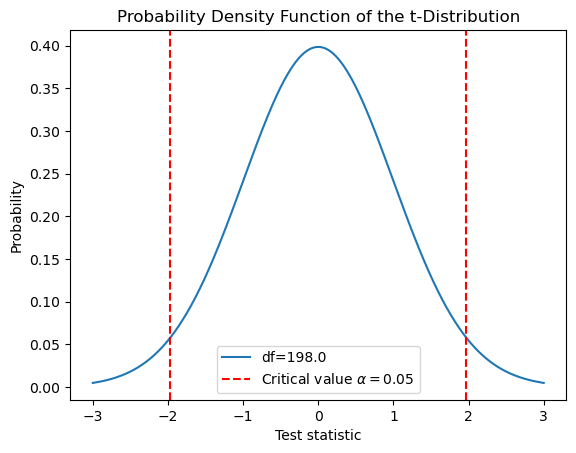

In [8]:
fig, ax = plt.subplots()

x = np.linspace(-3.0,3.0, 1000) #create a range of 1000 x values between -3 and +3

#Plot the t-distribution
ax.plot(x, stats.t.pdf(x, df=198), label="df=198.0")
ax.axvline(stats.t.ppf(0.025, df=198), color='r', linestyle='--', label=r"Critical value $\alpha=0.05$")
ax.axvline(stats.t.ppf(0.975, df=198), color='r', linestyle='--')
ax.set_title("Probability Density Function of the t-Distribution")
ax.set_xlabel("Test statistic")
ax.set_ylabel("Probability")
ax.legend()

### Simulations with mean difference $d = 0, 0.1, 0.2, \dots, 1.0$
*******************************************

In [12]:
# Initiate a seeded random number generator from Numpy
rng = np.random.default_rng(seed=64)
# Create an empty dictionary in which to store the results of each test
proportion_null_accepted = {}

# Set up the simulation  
for d in np.arange(0, 1.1, 0.1): #For each mean difference to be tested
    accept_null = 0 #Initiate a counter to count the number of times the null hypothesis is accept
    #Problem: Repeat the following simulation 1,000 times
    for i in range(1000):
        #1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1
        std_normal = rng.normal(loc=0, scale=1, size=100)  
        sample = rng.normal(loc=d, scale=1, size=100) 
        #2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
        test_stat, p_value = stats.ttest_ind(std_normal, sample)
        if p_value >= 0.05: 
            accept_null += 1 
        #3. Record the proportion of times the null hypothesis is not rejected
        proportion_null_accepted[d]=accept_null/1000 

Text(0.5, 1.0, 'Null Hypothesis Accepted Rate vs. Mean Difference')

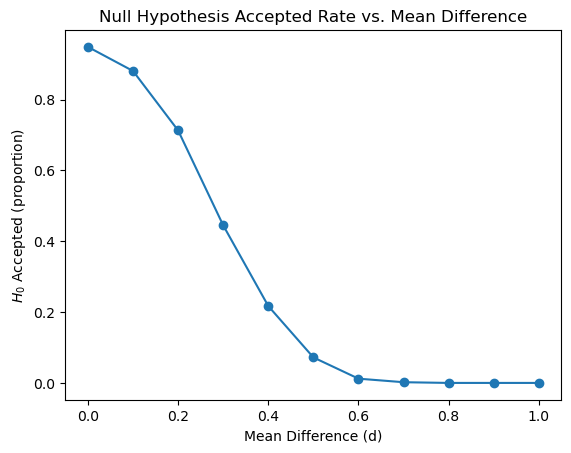

In [ ]:
#4. Plot this proportion against d
d = list(np.arange(0, 1.1, 0.1))
proportion = [proportion_null_accepted[d] for d in d]

fig, ax = plt.subplots()
ax.plot(d, proportion, marker="o")
ax.set_xlabel("Mean Difference (d)")
ax.set_ylabel(r"$H_0$ Accepted (proportion)")
ax.set_title("Null Hypothesis Accepted Rate vs. Mean Difference")

### Explain how the type II error rate changes as the difference in means increases
- At a mean difference of 0, the null hypothesis is true.
    - At $\alpha=0.05$, the proportion of time the null hypothesis is correctly accepted (i.e., a true negative) is $1 - \alpha$, 95%.
- At a mean difference of 0.1 and above, the proportion of times the null hypothesis is falsely accepted is given by $\beta$.
- $\beta$ is the probability of making a type II error. 
- The [power of the test](https://en.wikipedia.org/wiki/Power_(statistics)), e.g., the probability that the test correctly rejects the null hypothesis, is give by $1-\beta$. 
- The power of the test increases with increasing magnitude of the effect being measured [(effect size)](https://en.wikipedia.org/wiki/Effect_size), which can be seen in the plot above as the proportion of times the null hypothesis is not rejected decreases as the difference between the group means is increased. 


## Problem 4: ANOVA
*********************
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

### Oneway ANOVA
- ANOVA stands for analysis of variance.
- A oneway ANOVA is a type of hypothesis test that tests the null hypothesis that two or more groups have the same population mean. 
    - The [SciPy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) for the `f_oneway` test and the tutorial from [Laerd Statistics](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) on one-way ANOVA both give a good overview of the assumptions made when running an ANOVA on a number of samples. 
- An ANOVA assumes that all the samples are drawn from a normally distributed population, all samples are indepenent, and that the population standard deviations are equal. 
    - **$H_0$:** The null hypothesis in an ANOVA is that the population means from which all samples were taken are equal. 
    - **$H_a$:** The alternative hypothesis is that at least one population mean differs from the rest.

In [43]:
#Import Libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

### Problem 4
****************************
#### Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

In [37]:
#Initiate a random number generator from Numpy 
rng = np.random.default_rng(seed=1412)
#Draw 3 samples of size 30 from from normal distributions with means 0, 0.5, and 1, each with standard deviation 1
sample_a = rng.normal(loc=0, scale=1, size=30) 
sample_b = rng.normal(loc=0.5, scale=1, size=30)
sample_c = rng.normal(loc=1, scale=1, size=30)

****************************
#### 1. Perform a one-way ANOVA to test whether all three means are equal.

In [38]:
#Set a significance level for the hypothesis tests (reject H0 if p-value < alpha)
alpha=0.05

In [46]:
#1. Perform a one-way ANOVA to test whether all three means are equal.
f_stat_anova, p_value_anova = stats.f_oneway(sample_a, sample_b, sample_c)

************************
#### 2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3

In [48]:
#2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3
_, p_value_ttest1=stats.ttest_ind(sample_a, sample_b)
_, p_value_ttest2=stats.ttest_ind(sample_a, sample_c)
_, p_value_ttest3=stats.ttest_ind(sample_c, sample_b)

************************
#### 3. Compare the conclusions

In [53]:
#3. Compare the conclusions

#Conclusion from the ANOVA
if p_value_anova <= alpha:
    print("The ANOVA result was statistically significant, so the null hypothesis was rejected.")
else:
    print("The ANOVA failed to reject the null hypothesis.")

type_ii_errors = 0 #Count the Type II errors (failing to reject the null hypothesis)
if p_value_ttest1>alpha:
    type_ii_errors+=1
if p_value_ttest2>alpha:
    type_ii_errors+=1
if p_value_ttest3>alpha:
    type_ii_errors+=1

#Conclusion from the three t-tests performed
print(f"{type_ii_errors} out of the 3 independent t-tests failed to reject the null hypothesis.")


The ANOVA result was statistically significant, so the null hypothesis was rejected.
1 out of the 3 independent t-tests failed to reject the null hypothesis.


- Running 3 independent samples t-tests resulted in one of the t-tests failing to reject the null hypothesis.
- The ANOVA p-value was calculated to be less than the significance level of 0.05, therefore the null hypothesis was rejected in favour of the alternative hypothesis that the three groups have different population means. 
- The ANOVA does not tell me which of the three groups are different, or if they are all different.  
- Tukey's test can be run on the groups
- It is a post hoc test, run after ANOVA confirms there is a difference
- Runs pairwise group comparisons - gives p-values for each pariwise comparison

************************
#### Write a short note on why ANOVA is preferred over running several t-tests.

ANOVA is preferred over multiple t-tests due to the fact that with multiple *t*-tests we are more likely to get a type I error with one of them. When we set a significance level of 0.05, this means we are accepting a 5% probability of incorrectly rejecting the null hypothesis with each of the *t*-tests we are running. When we compare more than one group using multiple pairwise *t*-tests, the probability of making at least one Type I error increases. For example, with sample_a, sample_b and sample_c in the problem 4 above, when we compare the three independent samples using three *t*-tests:

- sample_a vs. sample_b: 5% chance of a type I error 
- sample_a vs. sample_c: 5% chance of a type I error
- sample_b vs. sample_c: 5% chance of a type I error

ANOVA avoids this issues because rather than comparing groups pairwise, ANOVA looks at all groups simultaneously and assesses whether the variability between group means is larger than would be expected by random chance alone.

### How the Oneway ANOVA Test Works
- In order to carry out a oneway ANOVA, a **sum of squares** is calculated for 
each source of variation. 
    - **Within group variance:** For each group, the mean is calculated for the 
observations within the group. The SSQ distance between each observation and 
its respective group mean is the within group variance. 
    - **Among group variance:** The SSQ distance between each observation and 
the overall mean is also calculated.
- Under the null hypothesis that the observations in the different groups all 
have the same population mean, the among-group variance will be the same as the 
within-group variance
- The ***F*-statistic** reported by scipy's `f_oneway` test therefore is the ratio of the variance *among* groups divided by the variance *between* groups.
- Like the test statistic from an independent-samples *t*-test follows a 
*t*-distribution in problem 3 above, under the null hypothesis the *F*-statistic 
follows a known distribution known as an [*F*-distribution](https://en.wikipedia.
org/wiki/F-distribution), and the probability of obtaining the observed 
*F*-statistic under the null hypothesis can be calculated.  
******************
#### References
- This Geeks for Geeks article on [*F*-tests](https://www.geeksforgeeks.org/machine-learning/f-test/) goes over the maths behind *F*-tests, *F*-distributions, and understanding *F*-test statistics in detail. 
- The [JMP documentation](https://www.jmp.com/en/statistics-knowledge-portal/one-way-anova) for a oneway ANOVA and the [Geeks for Geeks tutorial](https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/) both 
provided some detail how the ANOVA works under the hood. 
- This article on running a oneway ANOVA in the [Handbook of Biological 
Statistics](https://www.biostathandbook.com/onewayanova.html) also provided a 
good explanation of how the test works. 

- Tukey's test can be run on the groups
- It is a post hoc test, run after ANOVA confirms there is a difference
- Runs pairwise group comparisons - gives p-values for each pariwise comparison